### Evaluate Effectiveness in terms of CAC

1.Last interaction : display > social > email > paid_search> referral 

2.Position_based   : display > social > email > paid_search > referral 

3.Linear           : display > social > email > paid_search > referral 

4.First interaction: display > email > social > paid_search > referral 

5.Last non-direct  : display > social > email > referral > paid_search 

In most cases, display > social > email > paid_search> referral

### When it's useful
1.Last interaction : when sales cycle does not involve a consideration phase

2.Position_based   : When you value touchpoints that introduced customers and resulted in sales

3.Linear           : when your ads are designed to maintain contact throught entire cycle

4.First interaction: When you are starting off/want to create initial awareness

5.Last non-direct  : when you want to filter out direct traffic

### Allocate 250 dollars

display tier1:  USD 50 

display tier2: USD 100

social tier1:   USD 50

email tier1 :   USD 50

The assumed number of customers = 83+158+66+65

## Read data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('attribution_allocation_student_data.csv')

In [3]:
df.head()

,convert_TF,touch_1,touch_2,touch_3,touch_4,touch_5,tier
0,True,email,direct,social,NaN,NaN,1
1,True,social,direct,organic_search,NaN,NaN,1
2,True,organic_search,display,social,NaN,NaN,1
3,True,social,direct,NaN,NaN,NaN,1
4,True,social,display,direct,NaN,NaN,1


In [4]:
df.tier.value_counts()

3    109206
2     72804
1     36402
Name: tier, dtype: int64

In [5]:
spending = pd.read_csv('channel_spend_student_data.csv')

In [6]:
spending

,tier,spend by channel
0,1,"{'social': 50, 'organic_search': 0, 'referral'..."
1,2,"{'social': 100, 'organic_search': 0, 'referral..."
2,3,"{'social': 150, 'organic_search': 0, 'referral..."
3,total,"{'social': 300, 'organic_search': 0, 'referral..."


In [7]:
#pd.set_option('display.max_colwidth', -1)

## Attribution: Allocate conversions by channel

In [8]:
# Test 3 methods for allocation
# Calculate CAC for each of the channels
# Discuss observations and potential conclusions from CAC calculations

In [9]:
df.head()

,convert_TF,touch_1,touch_2,touch_3,touch_4,touch_5,tier
0,True,email,direct,social,NaN,NaN,1
1,True,social,direct,organic_search,NaN,NaN,1
2,True,organic_search,display,social,NaN,NaN,1
3,True,social,direct,NaN,NaN,NaN,1
4,True,social,display,direct,NaN,NaN,1


In [10]:
df.convert_TF.value_counts()

False    216034
True       2378
Name: convert_TF, dtype: int64

In [11]:
df_True = df[df.convert_TF == True]

### (Method1) Last interaction

In [12]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):    
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_5] += 1 
        if pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_4] += 1
            if pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_3] += 1
                if pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_2] += 1
                    if pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)

In [13]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'social': 58,
                           'organic_search': 121,
                           'direct': 122,
                           'display': 72,
                           'email': 65,
                           'paid_search': 2,
                           'referral': 1})],
             2: [defaultdict(int,
                          {'direct': 197,
                           'social': 129,
                           'organic_search': 223,
                           'display': 159,
                           'email': 99,
                           'referral': 2,
                           'paid_search': 2})],
             3: [defaultdict(int,
                          {'direct': 294,
                           'display': 175,
                           'social': 165,
                           'organic_search': 318,
                           'email': 159,
                           'paid_search': 8,
     

In [14]:
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.85
organic_search_CAC = 0.0
email_CAC = 0.93
display_CAC = 0.74
direct_CAC = 0.0
referral_CAC = 30.0
paid_search_CAC = 25.0


### (Method2) Position Based

In [36]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_1] += 0.4
            dic2[row.touch_2] += 0.2/3
            dic2[row.touch_3] += 0.2/3
            dic2[row.touch_4] += 0.2/3
            dic2[row.touch_5] += 0.4
        if pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_1] += 0.4
                dic2[row.touch_2] += 0.2/2
                dic2[row.touch_3] += 0.2/2
                dic2[row.touch_4] += 0.4
            if pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_1] += 0.4
                    dic2[row.touch_2] += 0.2
                    dic2[row.touch_3] += 0.4
                if pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_1] += .5
                        dic2[row.touch_2] += .5
                    if pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)          

In [16]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'email': 64.53333333333333,
                           'direct': 105.70000000000013,
                           'social': 65.83333333333336,
                           'organic_search': 118.10000000000032,
                           'display': 83.40000000000012,
                           'referral': 1.4,
                           'paid_search': 2.033333333333333})],
             2: [defaultdict(int,
                          {'organic_search': 226.7666666666671,
                           'display': 158.30000000000044,
                           'social': 126.23333333333368,
                           'email': 110.73333333333366,
                           'direct': 183.6000000000003,
                           'paid_search': 3.2666666666666666,
                           'referral': 2.1})],
             3: [defaultdict(int,
                          {'social': 157.23333333333372,
                         

In [17]:
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.86
organic_search_CAC = 0.0
email_CAC = 0.88
display_CAC = 0.72
direct_CAC = 0.0
referral_CAC = 29.13
paid_search_CAC = 26.71


### (Method3) Linear

In [18]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_1] += 1/5
            dic2[row.touch_2] += 1/5
            dic2[row.touch_3] += 1/5
            dic2[row.touch_4] += 1/5
            dic2[row.touch_5] += 1/5
        if pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_1] += 1/4
                dic2[row.touch_2] += 1/4
                dic2[row.touch_3] += 1/4
                dic2[row.touch_4] += 1/4
            if pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_1] += 1/3
                    dic2[row.touch_2] += 1/3
                    dic2[row.touch_3] += 1/3
                if pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_1] += .5
                        dic2[row.touch_2] += .5
                    if pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)   

In [19]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'email': 62.71666666666676,
                           'direct': 102.66666666666664,
                           'social': 68.58333333333346,
                           'organic_search': 117.63333333333317,
                           'display': 85.91666666666664,
                           'referral': 1.3333333333333333,
                           'paid_search': 2.15})],
             2: [defaultdict(int,
                          {'organic_search': 225.28333333333356,
                           'display': 153.86666666666653,
                           'social': 129.1166666666666,
                           'email': 111.9166666666666,
                           'direct': 185.03333333333353,
                           'paid_search': 3.066666666666667,
                           'referral': 2.716666666666667})],
             3: [defaultdict(int,
                          {'social': 155.46666666666667,
          

In [20]:
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.85
organic_search_CAC = 0.0
email_CAC = 0.89
display_CAC = 0.72
direct_CAC = 0.0
referral_CAC = 29.17
paid_search_CAC = 28.39


### (Method4) First interaction

In [21]:
df_True.touch_1.value_counts()

organic_search    675
direct            550
display           434
email             357
social            340
paid_search        12
referral           10
Name: touch_1, dtype: int64

In [22]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_1) != True:
            dic2[row.touch_1] += 1
    dic1[k].append(dic2)   

In [23]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'email': 67,
                           'social': 71,
                           'organic_search': 113,
                           'direct': 94,
                           'display': 92,
                           'paid_search': 2,
                           'referral': 2})],
             2: [defaultdict(int,
                          {'organic_search': 233,
                           'social': 118,
                           'direct': 171,
                           'email': 116,
                           'display': 167,
                           'paid_search': 5,
                           'referral': 1})],
             3: [defaultdict(int,
                          {'social': 151,
                           'email': 174,
                           'direct': 285,
                           'display': 175,
                           'organic_search': 329,
                           'referral': 7,
        

In [24]:
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.88
organic_search_CAC = 0.0
email_CAC = 0.84
display_CAC = 0.69
direct_CAC = 0.0
referral_CAC = 30.0
paid_search_CAC = 25.0


### (Method5) Last non-direct interaction

In [25]:
from collections import defaultdict
dic1 = defaultdict(list)

for k in list(range(1,4)):    
    dic2 = defaultdict(int)
    for i, row in df_True[df_True.tier == k].iterrows():
        if pd.isnull(row.touch_5) != True:
            dic2[row.touch_4] += 1 
        if pd.isnull(row.touch_5) == True:
            if pd.isnull(row.touch_4) != True:
                dic2[row.touch_3] += 1
            if pd.isnull(row.touch_4) == True:
                if pd.isnull(row.touch_3) != True:
                    dic2[row.touch_2] += 1
                if pd.isnull(row.touch_3) == True:
                    if pd.isnull(row.touch_2) != True:
                        dic2[row.touch_1] += 1
                    if pd.isnull(row.touch_2) == True:
                        if pd.isnull(row.touch_1) != True:
                            dic2[row.touch_1] += 1
    dic1[k].append(dic2)

In [26]:
dic1

defaultdict(list,
            {1: [defaultdict(int,
                          {'direct': 96,
                           'display': 97,
                           'social': 70,
                           'email': 55,
                           'organic_search': 120,
                           'referral': 1,
                           'paid_search': 2})],
             2: [defaultdict(int,
                          {'email': 119,
                           'organic_search': 234,
                           'direct': 181,
                           'display': 139,
                           'social': 131,
                           'referral': 5,
                           'paid_search': 2})],
             3: [defaultdict(int,
                          {'display': 169,
                           'organic_search': 331,
                           'social': 162,
                           'direct': 296,
                           'email': 158,
                           'paid_search': 5,
     

In [27]:
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['direct','organic_search']:
        CAC =  300 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))
    elif tier in ['direct','organic_search']:
        CAC = 0 / (dic1[1][0][tier] + dic1[2][0][tier] + dic1[3][0][tier])
        print(tier + "_CAC = "+ str(round(CAC,2)))

social_CAC = 0.83
organic_search_CAC = 0.0
email_CAC = 0.9
display_CAC = 0.74
direct_CAC = 0.0
referral_CAC = 27.27
paid_search_CAC = 33.33


# Visualization

In [28]:
import seaborn as sns

In [29]:
viz_dt = {'social_CAC':[0.85,.86,.85,.88,.83],
         'organic_search_CAC':[0,0,0,0,0],
         'email_CAC':[0.93,0.88,.89,.84,.9],
         'display_CAC':[0.74,0.72,0.72,0.69,0.74],
         'direct_CAC':[0,0,0,0,0],
         'referral_CAC':[30.0,29.13,29.17,30.0,27.27],
         'paid_search_CAC':[25.0,26.71,28.39,25.0,33.33]}

viz= pd.DataFrame(viz_dt, index=['Last interaction','Position_based','Linear','First interaction','Last non-direct interaction'])

viz

,social_CAC,organic_search_CAC,email_CAC,display_CAC,direct_CAC,referral_CAC,paid_search_CAC
Last interaction,0.85,0,0.93,0.74,0,30.00,25.00
Position_based,0.86,0,0.88,0.72,0,29.13,26.71
Linear,0.85,0,0.89,0.72,0,29.17,28.39
First interaction,0.88,0,0.84,0.69,0,30.00,25.00
Last non-direct interaction,0.83,0,0.90,0.74,0,27.27,33.33


In [30]:
viz.columns

Index(['social_CAC', 'organic_search_CAC', 'email_CAC', 'display_CAC',
       'direct_CAC', 'referral_CAC', 'paid_search_CAC'],
      dtype='object')

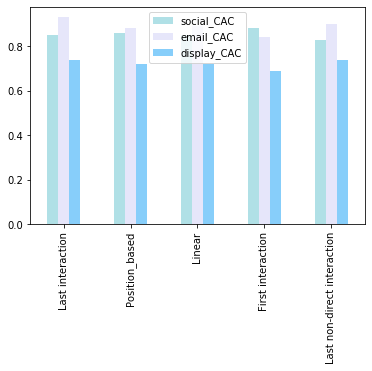

In [31]:
viz[['social_CAC', 'email_CAC','display_CAC']].plot(kind='bar',color=['powderblue', 'lavender', 'lightskyblue', 'steelblue', 'lightslategray']);

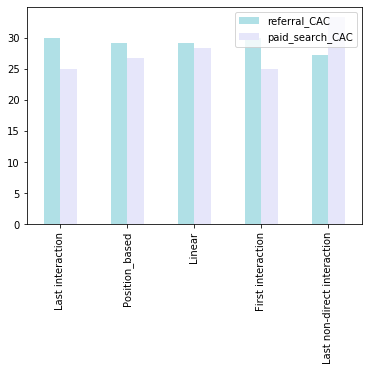

In [32]:
viz[['referral_CAC', 'paid_search_CAC']].plot(kind='bar',color=['powderblue', 'lavender', 'lightskyblue', 'steelblue', 'lightslategray']);

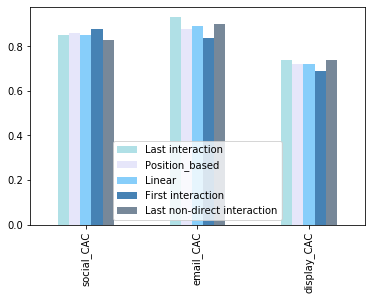

In [33]:
viz[['social_CAC', 'email_CAC','display_CAC']].T.plot(kind='bar',color=['powderblue', 'lavender', 'lightskyblue', 'steelblue', 'lightslategray']);

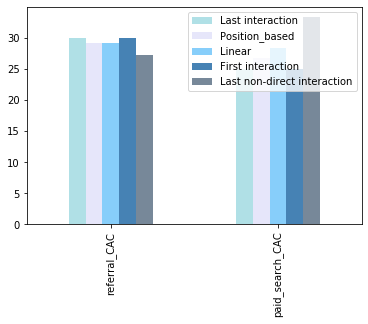

In [34]:
viz[['referral_CAC', 'paid_search_CAC']].T.plot(kind='bar',color=['powderblue', 'lavender', 'lightskyblue', 'steelblue', 'lightslategray']);


## Allocation

In [35]:
# For one of the allocation methods, calculate the marginal CAC by spending tier by channel
# Discuss how your observations/conclusions from the previous section may change
# we want to allocate the same budget in $50 increments, i.e. $700 spend on display adds, $50 spend on social ads, etc. 
# Determine how you would most effectively allocate this budget.

### tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']

In [37]:
df_channels = pd.DataFrame()
tier_list = ['social', 'organic_search', 'email', 'display', 'direct', 'referral', 'paid_search']
for tier in tier_list:
    if tier not in ['organic_search','direct']:
        data = {'Cumulative spend':[50,150,300],
           'Cumulative number of conversions':[dic1[1][0][tier],(dic1[1][0][tier]+dic1[2][0][tier]),(dic1[1][0][tier]+dic1[2][0][tier]+dic1[3][0][tier])],
           'Average CAC':[50/dic1[1][0][tier], 150/(dic1[1][0][tier]+dic1[2][0][tier]), 300/(dic1[1][0][tier]+dic1[2][0][tier]+dic1[3][0][tier])],
           'Marginal spend':[50,100,150],
           'Marginal conversions':[dic1[1][0][tier],dic1[2][0][tier],dic1[3][0][tier]],
           'Marginal CAC':[50/(dic1[1][0][tier]), 100/(dic1[2][0][tier]), 150/(dic1[3][0][tier])],
               'Channel':tier}
    elif tier in ['organic_search','direct']:
            data = {'Cumulative spend':[0,0,0],
           'Cumulative number of conversions':[dic1[1][0][tier],(dic1[1][0][tier]+dic1[2][0][tier]),(dic1[1][0][tier]+dic1[2][0][tier]+dic1[3][0][tier])],
           'Average CAC':[0/dic1[1][0][tier], 0/(dic1[1][0][tier]+dic1[2][0][tier]), 0/(dic1[1][0][tier]+dic1[2][0][tier]+dic1[3][0][tier])],
           'Marginal spend':[0,0,0],
           'Marginal conversions':[dic1[1][0][tier],dic1[2][0][tier],dic1[3][0][tier]],
           'Marginal CAC':[0/(dic1[1][0][tier]), 0/(dic1[2][0][tier]), 0/(dic1[3][0][tier])],
               'Channel':tier}

    df_channel = pd.DataFrame(data, index =['tier1 ($50)','tier2 ($100)','tier3 ($150)'])
    df_channels = pd.concat([df_channels, df_channel])

In [38]:
df_channels

,Cumulative spend,Cumulative number of conversions,Average CAC,Marginal spend,Marginal conversions,Marginal CAC,Channel
tier1 ($50),50,65.833333,0.759494,50,65.833333,0.759494,social
tier2 ($100),150,192.066667,0.780979,100,126.233333,0.792184,social
tier3 ($150),300,349.300000,0.858861,150,157.233333,0.953996,social
tier1 ($50),0,118.100000,0.000000,0,118.100000,0.000000,organic_search
tier2 ($100),0,344.866667,0.000000,0,226.766667,0.000000,organic_search
tier3 ($150),0,669.033333,0.000000,0,324.166667,0.000000,organic_search
tier1 ($50),50,64.533333,0.774793,50,64.533333,0.774793,email
tier2 ($100),150,175.266667,0.855839,100,110.733333,0.903070,email
tier3 ($150),300,340.566667,0.880885,150,165.300000,0.907441,email
tier1 ($50),50,83.400000,0.599520,50,83.400000,0.599520,display


In [39]:
# create a pivot table (CAC)
Marginal_CAC_table = pd.pivot_table(df_channels, index=df_channels.index, columns='Channel', values='Marginal CAC')
Marginal_CAC_table

Channel,direct,display,email,organic_search,paid_search,referral,social
tier1 ($50),0.0,0.599520,0.774793,0.0,24.590164,35.714286,0.759494
tier2 ($100),0.0,0.631712,0.903070,0.0,30.612245,47.619048,0.792184
tier3 ($150),0.0,0.857143,0.907441,0.0,25.280899,22.058824,0.953996


In [40]:
# create a pivot table (# of converions)
Number_of_conversions = pd.DataFrame(50/Marginal_CAC_table.iloc[0])
Number_of_conversions = Number_of_conversions.join(100/Marginal_CAC_table.iloc[1])
Number_of_conversions = Number_of_conversions.join(150/Marginal_CAC_table.iloc[2])
Number_of_conversions = Number_of_conversions.T
round(Number_of_conversions,0)

Channel,direct,display,email,organic_search,paid_search,referral,social
tier1 ($50),inf,83.0,65.0,inf,2.0,1.0,66.0
tier2 ($100),inf,158.0,111.0,inf,3.0,2.0,126.0
tier3 ($150),inf,175.0,165.0,inf,6.0,7.0,157.0


In [41]:
"""
display tier1: $ 50 
display tier2: $100
social tier1: $50
"""
83+158+66+65

372